In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
root_search = 'searches.csv.bz2'
root_booking = 'bookings.csv.bz2'

## Reading booking extract

In [3]:
df_booking = pd.read_csv(root_booking, nrows=100000, sep='^')
df_booking.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [4]:
df_booking.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [5]:
df_booking.columns = df_booking.columns.str.strip()
df_booking.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [6]:
df_booking.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [7]:
df_booking = df_booking[['cre_date', 'dep_port', 'arr_port','pax']]
df_booking.head()

,cre_date,dep_port,arr_port,pax
0,2013-02-22 00:00:00,ZRH,LHR,-1
1,2013-03-26 00:00:00,SAL,CLT,1
2,2013-03-26 00:00:00,SAL,CLT,1
3,2013-03-26 00:00:00,AKL,SVO,1
4,2013-03-26 00:00:00,AKL,SVO,1


In [8]:
# Cleaning the cre_date column:
df_booking['cre_date'] = df_booking.cre_date.dropna()
df_booking['cre_date'] = df_booking.cre_date.str[:10]
df_booking.head()

# Cleaning the dep_port column:
df_booking['dep_port'] = df_booking.dep_port.dropna()
df_booking['dep_port'] = df_booking.dep_port.str.strip()
df_booking['dep_port'] = df_booking.dep_port.str.upper()

# Cleaning the arr_port column:
df_booking['arr_port'] = df_booking.arr_port.dropna()
df_booking['arr_port'] = df_booking.arr_port.str.strip()
df_booking['arr_port'] = df_booking.arr_port.str.upper()


In [9]:
df_booking = df_booking[df_booking.pax > 0]
df_booking.head()

,cre_date,dep_port,arr_port,pax
1,2013-03-26,SAL,CLT,1
2,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
4,2013-03-26,AKL,SVO,1
5,2013-03-20,DEN,LGA,1


In [10]:
df_booking_gr = df_booking.groupby(['cre_date', 'dep_port', 'arr_port'])['pax'].sum().sort_values(ascending = False).reset_index()
df_booking_gr.head()


,cre_date,dep_port,arr_port,pax
0,2013-03-18,SEA,FAY,112
1,2013-01-16,DME,CDG,110
2,2013-04-04,BKK,CAN,106
3,2013-01-22,ADL,SYD,104
4,2013-03-26,GOT,FCO,100


## Reading Searches extract

In [11]:
df_search = pd.read_csv(root_search, sep='^', nrows=10000)


In [12]:
df_search.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [13]:
df_search.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [14]:
df_search.columns = df_search.columns.str.strip()

In [15]:
df_search = df_search[['Date', 'Origin', 'Destination']]
df_search.head()

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD


In [16]:
df_search['Origin'] = df_search.Origin.str.strip()
df_search['Origin'] = df_search.Origin.str.upper()
df_search['Origin'] = df_search.Origin.dropna()

In [17]:
df_search['Destination'] = df_search.Destination.str.strip()
df_search['Destination'] = df_search.Destination.str.upper()
df_search['Destination'] = df_search.Destination.dropna()

In [18]:
df_search['Date'] = df_search.Date.dropna()
df_search['Date'] = df_search[df_search.Date.str.len() == 10]
df_search['Date'] = pd.to_datetime(df_search.Date).dt.date

In [19]:
df_search.head()

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD


In [20]:
df_search.drop_duplicates(inplace=True)
df_search.shape

(9553, 3)

#### Time to merge both datasets: bookings & searches

In [21]:
df_search.head()

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD


In [22]:
df_booking_gr.head()

,cre_date,dep_port,arr_port,pax
0,2013-03-18,SEA,FAY,112
1,2013-01-16,DME,CDG,110
2,2013-04-04,BKK,CAN,106
3,2013-01-22,ADL,SYD,104
4,2013-03-26,GOT,FCO,100


In [23]:
df_booking_search = df_search.merge(df_booking, left_on= ['Date', 'Origin', 'Destination'], right_on = ['cre_date', 'dep_port', 'arr_port'], how='left')
df_booking_search.head()

,Date,Origin,Destination,cre_date,dep_port,arr_port,pax
0,2013-01-01,TXL,AUH,NaN,NaN,NaN,NaN
1,2013-01-01,ATH,MIL,NaN,NaN,NaN,NaN
2,2013-01-01,ICT,SFO,NaN,NaN,NaN,NaN
3,2013-01-01,RNB,ARN,NaN,NaN,NaN,NaN
4,2013-01-01,OSL,MAD,NaN,NaN,NaN,NaN


In [24]:
df_booking_search = df_booking_search.drop(['cre_date', 'dep_port', 'arr_port'], axis = 1)
df_booking_search.head()

,Date,Origin,Destination,pax
0,2013-01-01,TXL,AUH,NaN
1,2013-01-01,ATH,MIL,NaN
2,2013-01-01,ICT,SFO,NaN
3,2013-01-01,RNB,ARN,NaN
4,2013-01-01,OSL,MAD,NaN


In [25]:
df_booking_search['Booking'] = np.where(df_booking_search.pax.isna(), 0, 1)
df_booking_search.head()

,Date,Origin,Destination,pax,Booking
0,2013-01-01,TXL,AUH,NaN,0
1,2013-01-01,ATH,MIL,NaN,0
2,2013-01-01,ICT,SFO,NaN,0
3,2013-01-01,RNB,ARN,NaN,0
4,2013-01-01,OSL,MAD,NaN,0


In [26]:
df_booking_search = df_booking_search.sort_values(by = 'pax', ascending = False)
df_booking_search.head()

,Date,Origin,Destination,pax,Booking
0,2013-01-01,TXL,AUH,NaN,0
1,2013-01-01,ATH,MIL,NaN,0
2,2013-01-01,ICT,SFO,NaN,0
3,2013-01-01,RNB,ARN,NaN,0
4,2013-01-01,OSL,MAD,NaN,0


### Loading the entire datasets

Define the functions to clean the datasets when reading them

In [27]:
def clean_bookings(data):
    "Returns DataFrame filtering and cleaning the initial dataset"
    import warnings
    
    warnings.filterwarnings('ignore')
    
    # Trimming the columns spaces
    data.columns = data.columns.str.strip()
    
    # Cleaning the cre_date column:
    data['cre_date'] = data.cre_date.dropna()
    data['cre_date'] = data.cre_date.str[:10]
    data['cre_date'] = pd.to_datetime(data.cre_date, errors='coerce').dt.date
    
    # Cleaning the dep_port column: strip, dropna, upper
    data['dep_port'] = data.dep_port.dropna()
    data['dep_port'] = data.dep_port.str.strip()
    data['dep_port'] = data.dep_port.str.upper()
    
    # Cleaning the arr_port column: strip, dropna, upper
    data['arr_port'] = data.arr_port.dropna()
    data['arr_port'] = data.arr_port.str.strip()
    data['arr_port'] = data.arr_port.str.upper()
    
    # Delete the return bookings: pax < 0 (negative)
    data = data[data.pax > 0]
    data = data.groupby(['cre_date', 'dep_port', 'arr_port'])['pax'].sum().sort_values(ascending=False).reset_index().drop_duplicates()
    
    return data
    

In [28]:
def clean_searches(data):
    "Cleaner dedicated to shrink the data imported and treated by pd.read_csv"  
    import warnings
    
    warnings.filterwarnings('ignore')
    
    # Trimming the columns spaces
    data.columns = data.columns.str.strip()
    
    # Cleaning Date columns
    data['Date'] = data.Date.dropna()
    data['Date'] = data[data.Date.str.len() == 10]   # A Date should have no more than 10 characters
    data['Date'] = pd.to_datetime(data.Date, errors='coerce').dt.date
    
    # Cleaning the Origin column: strip, dropna, upper
    data['Origin'] = data.Origin.dropna()
    data['Origin'] = data.Origin.str.strip().str.upper()
    
    # Cleaning the Destination column: strip, dropna, upper
    data['Destination'] = data.Destination.dropna()
    data['Destination'] = data.Destination.str.strip().str.upper()
    
    data = data.drop_duplicates()
    
    return data


Creating empty csv to dump the data for each append and store the data in the ROM instead of in the RAM

booking_cols = ['cre_date', 'dep_port', 'arr_port', 'pax'] searches_cols = ['Date', 'Origin', 'Destination'] df_book = pd.DataFrame({}, columns=booking_cols) df_search = pd.DataFrame({}, columns=searches_cols) df_book.to_csv('bookings_cleaned.csv', index=False) df_search.to_csv('searches_cleaned.csv', index=False)

Loading the full datasets: bookings & searches

In [31]:
BookingsFile = pd.read_csv(root_booking, usecols=['cre_date           ', 'dep_port', 'arr_port', 'pax'], sep='^', chunksize=10**6)
b_chunks = []
loaded_rows = 0
for chunk in BookingsFile:
    loaded_rows += chunk.shape[0]
    cleaned_chunk = clean_bookings(chunk)
    
    b_chunks.append(cleaned_chunk)
    
    print(cleaned_chunk)
    print("Rows loaded:", loaded_rows)

          cre_date dep_port arr_port  pax
0       2013-10-11      SVO      VCE  320
1       2013-02-13      LED      KGD  268
2       2013-05-20      JFK      ATH  264
3       2012-07-16      TLV      PEK  242
4       2013-01-10      ARN      KRN  238
5       2013-05-16      CPH      BRU  226
6       2013-01-14      FRA      ICN  220
7       2013-03-06      VKO      TLV  198
8       2013-12-11      SVG      NCL  196
9       2013-01-11      JNB      BUQ  194
10      2013-08-28      CAI      ATH  192
11      2013-11-28      HAM      VIE  190
12      2013-10-16      LAX      IGU  188
13      2013-05-20      JNB      DUR  183
14      2013-08-29      OSL      LHR  180
15      2012-10-17      MUC      NAP  180
16      2013-01-14      FRA      LIS  164
17      2013-05-30      SVO      CDG  162
18      2012-11-27      IST      LED  160
19      2013-09-11      MUC      CDG  160
20      2013-01-08      ARN      LYS  160
21      2013-01-16      HEL      MXP  158
22      2013-09-12      HEL      E

In [32]:
bookings = pd.concat(b_chunks).drop_duplicates()
print(bookings.head())
print("Number of rows in bookings:", bookings.shape[0])

     cre_date dep_port arr_port    pax
0  2013-10-11      SVO      VCE  320.0
1  2013-02-13      LED      KGD  268.0
2  2013-05-20      JFK      ATH  264.0
3  2012-07-16      TLV      PEK  242.0
4  2013-01-10      ARN      KRN  238.0
Number of rows in bookings: 315585


In [29]:
SearchesFile = pd.read_csv(root_search, usecols=['Date', 'Origin', 'Destination'], sep='^', chunksize=10**6)
s_chunks = []
loaded_rows = 0
for chunk in SearchesFile:
    loaded_rows += chunk.shape[0]
    cleaned_chunk = clean_searches(chunk)
    
    s_chunks.append(cleaned_chunk)
    
    print(cleaned_chunk)
    print("Rows loaded:", loaded_rows)

              Date Origin Destination
0       2013-01-01    TXL         AUH
1       2013-01-01    ATH         MIL
2       2013-01-01    ICT         SFO
3       2013-01-01    RNB         ARN
4       2013-01-01    OSL         MAD
5       2013-01-01    IAH         BLR
6       2013-01-01    CPH         PAR
7       2013-01-01    PAR         DUB
8       2013-01-01    DUS         ACE
9       2013-01-01    FRA         BGW
10      2013-01-01    PAR         BUD
11      2013-01-01    RIO         POA
12      2013-01-01    HKG         MXP
13      2013-01-01    BCN         LON
14      2013-01-01    CLE         SNN
15      2013-01-01    BSB         SLZ
16      2013-01-01    PEK         PHL
17      2013-01-01    BOS         GRU
18      2013-01-01    TBS         IKT
19      2013-01-01    LON         HKG
20      2013-01-01    MAD         SEA
21      2013-01-01    DUS         STN
22      2013-01-01    PAD         FUE
23      2013-01-01    DUS         IST
24      2013-01-01    BHX         VIE
25      2013

In [30]:
searches = pd.concat(s_chunks).drop_duplicates()
print(searches.head())
print("Number of rows in searches:", searches.shape[0])

         Date Origin Destination
0  2013-01-01    TXL         AUH
1  2013-01-01    ATH         MIL
2  2013-01-01    ICT         SFO
3  2013-01-01    RNB         ARN
4  2013-01-01    OSL         MAD
Number of rows in searches: 344178


In [33]:
sch_bkg = searches.merge(bookings, left_on=['Date', 'Origin', 'Destination'], right_on=['cre_date', 'dep_port', 'arr_port'], how='left')
sch_bkg = sch_bkg.drop(['cre_date', 'dep_port', 'arr_port'], axis=1)
print(sch_bkg.head())
print("Number of rows in merged file", sch_bkg.shape[0])

         Date Origin Destination  pax
0  2013-01-01    TXL         AUH  NaN
1  2013-01-01    ATH         MIL  NaN
2  2013-01-01    ICT         SFO  NaN
3  2013-01-01    RNB         ARN  NaN
4  2013-01-01    OSL         MAD  NaN
Number of rows in merged file 344178


In [34]:
sch_bkg['Booking'] = np.where(
                            sch_bkg.pax.isna(),
                            0,
                            1)
sch_bkg = sch_bkg.sort_values(by='pax', ascending=False)
sch_bkg.head()

,Date,Origin,Destination,pax,Booking
89085,2013-04-04,BKK,CAN,138.0,1
8476,2013-01-09,LHR,JFK,132.0,1
175560,2013-07-03,MUC,BCN,126.0,1
176835,2013-07-04,BKK,NRT,123.0,1
14427,2013-01-16,FRA,JFK,120.0,1


In [35]:
sch_bkg.Booking.value_counts()

0    333258
1     10920
Name: Booking, dtype: int64

The ratio of bookings done based on searches is: 3.28%


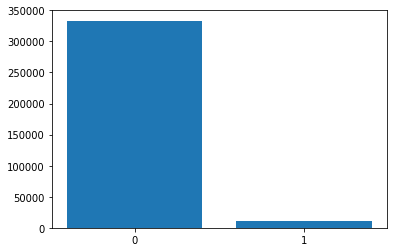

In [36]:
print("The ratio of bookings done based on searches is: {:.2%}".format(sch_bkg.Booking.value_counts().values[1] / sch_bkg.Booking.value_counts().values[0]))

plt.bar(sch_bkg.Booking.value_counts().index, sch_bkg.Booking.value_counts().values)

plt.xticks([0, 1])

plt.show()